In [1]:
# Let's import the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
data=pd.read_csv('/kaggle/input/student-performance-prediction-dataset/Students Performance .csv')
data.head()

,Student_ID,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,STUDENT1,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,STUDENT2,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,STUDENT3,19-22,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,STUDENT4,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,STUDENT5,19-22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


In [21]:
from sklearn.preprocessing import LabelEncoder
label_cols = [col for col in data.columns if col!='Weekly_Study_Hours']

le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])
data.head()


,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,2,1,0,1,0,1,1,2,1,0,0
1,0,2,1,0,1,0,1,1,1,2,1,0
2,2,2,0,0,1,2,2,0,1,1,1,0
3,1,2,1,0,0,2,1,0,2,1,0,0
4,1,2,0,0,0,12,1,1,1,2,1,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Student_ID          145 non-null    int64
 1   Student_Age         145 non-null    int64
 2   Sex                 145 non-null    int64
 3   High_School_Type    145 non-null    int64
 4   Scholarship         145 non-null    int64
 5   Additional_Work     145 non-null    int64
 6   Sports_activity     145 non-null    int64
 7   Transportation      145 non-null    int64
 8   Weekly_Study_Hours  145 non-null    int64
 9   Attendance          145 non-null    int64
 10  Reading             145 non-null    int64
 11  Notes               145 non-null    int64
 12  Listening_in_Class  145 non-null    int64
 13  Project_work        145 non-null    int64
 14  Grade               145 non-null    int64
dtypes: int64(15)
memory usage: 17.1 KB


In [8]:
#Summary statistics
print("Summary Statistics:")
print(data.describe)

Summary Statistics:
<bound method NDFrame.describe of      Student_ID Student_Age     Sex High_School_Type Scholarship  \
0      STUDENT1       19-22    Male            Other         50%   
1      STUDENT2       19-22    Male            Other         50%   
2      STUDENT3       19-22    Male            State         50%   
3      STUDENT4          18  Female          Private         50%   
4      STUDENT5       19-22    Male          Private         50%   
..          ...         ...     ...              ...         ...   
140  STUDENT141       19-22  Female            State         50%   
141  STUDENT142          18  Female            State         75%   
142  STUDENT143          18  Female          Private         75%   
143  STUDENT144       19-22  Female            State         75%   
144  STUDENT145          18  Female          Private        100%   

    Additional_Work Sports_activity Transportation  Weekly_Study_Hours  \
0               Yes              No        Private     

In [5]:
#Checking for missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Student_ID            0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           1
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=data.drop(columns=["Student_ID","Student_Age","Sex"])

cat_cols = data.select_dtypes(include='object').columns.tolist()
num_cols = data.select_dtypes(include=np.number).columns.tolist()

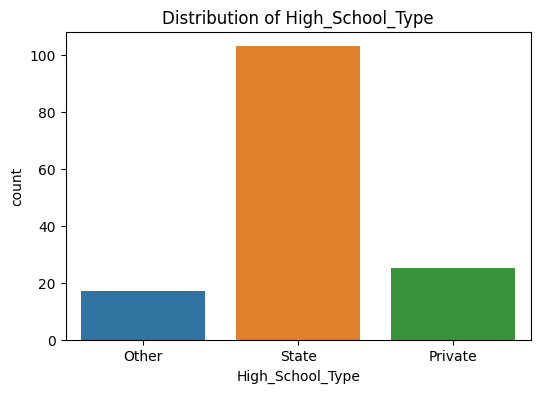

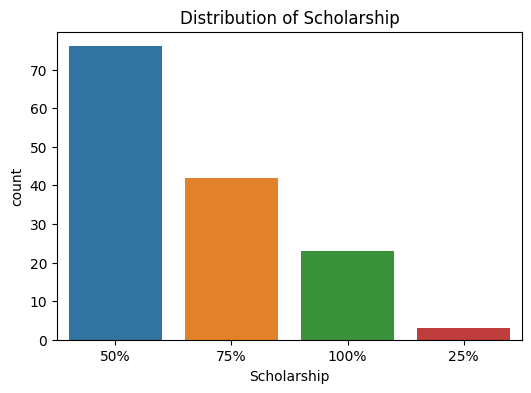

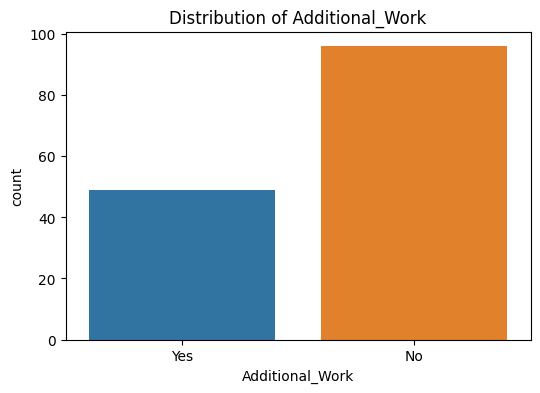

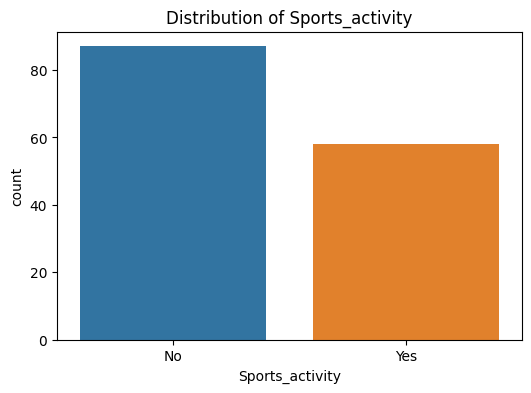

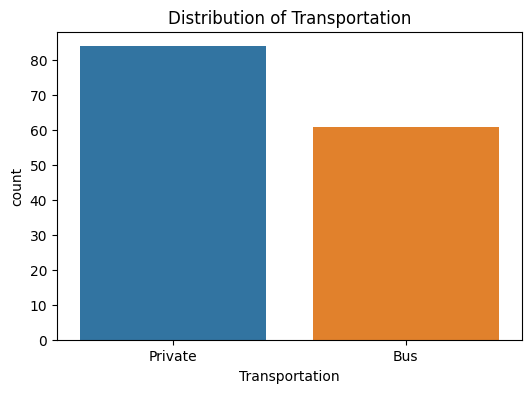

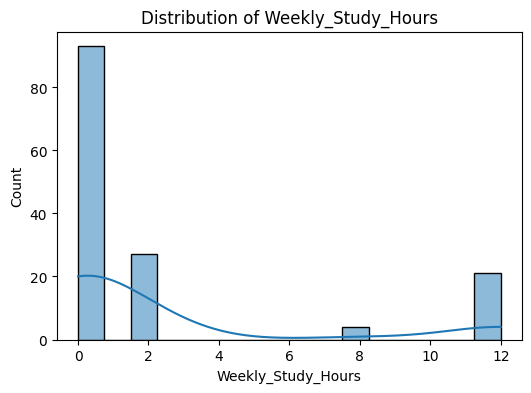

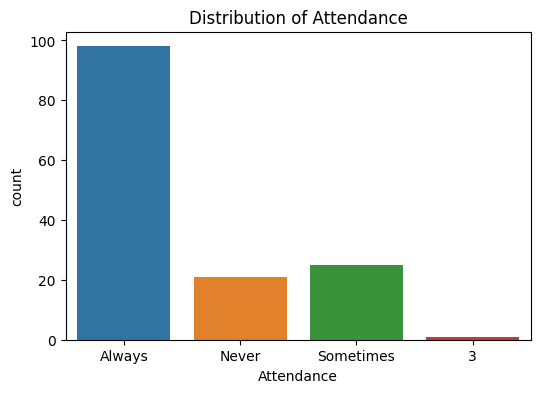

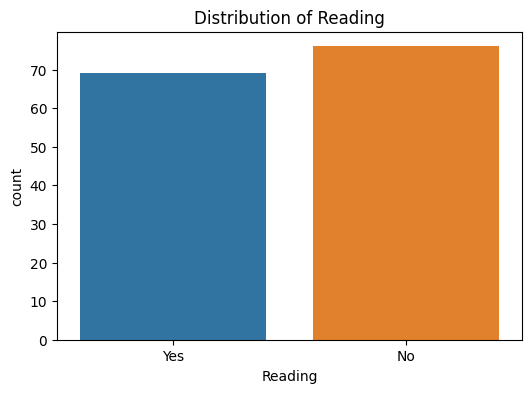

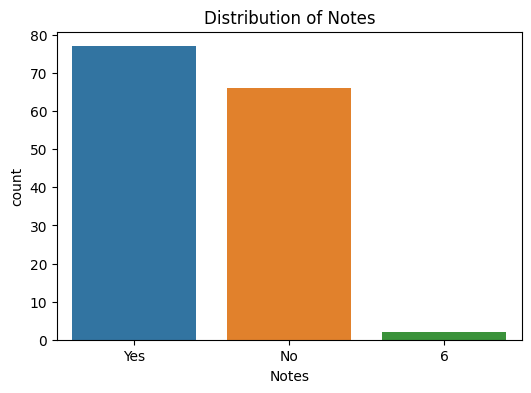

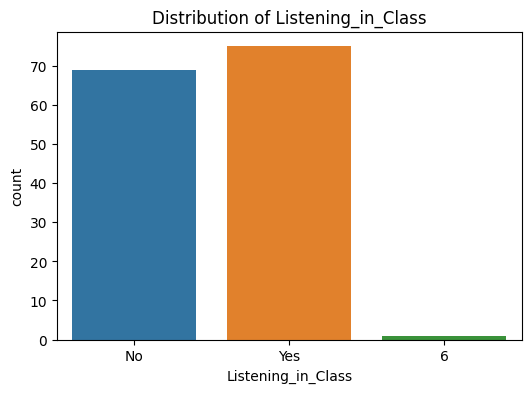

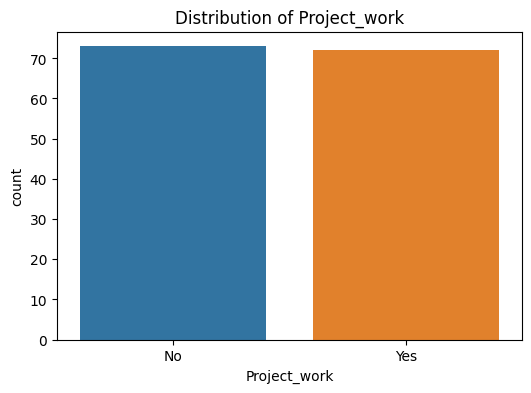

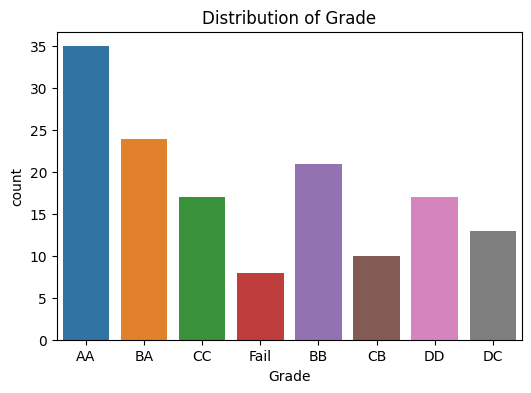

In [18]:
for col in data.columns:
    plt.figure(figsize=(6,4))
    if data[col].dtype == 'object':
        sns.countplot(x=col, data=data)
        plt.title(f"Distribution of {col}")
    else:
        sns.histplot(data[col], kde=True)
        plt.title(f"Distribution of {col}")
    plt.show()

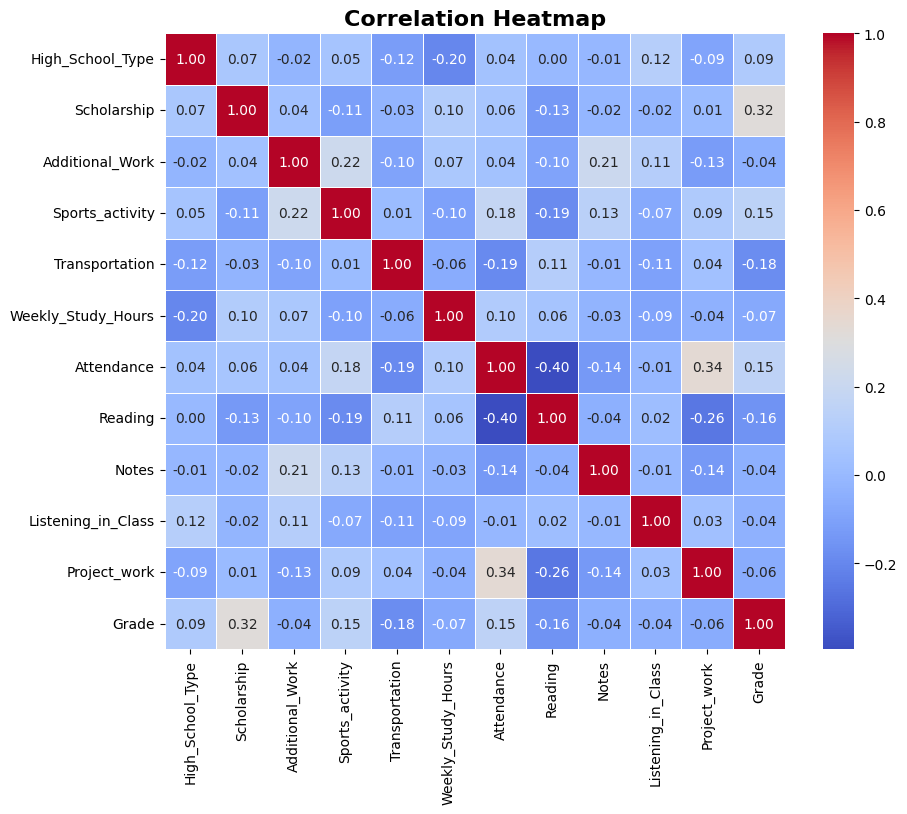

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5, cbar=True)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.show()
